In [2]:
# import necessary packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy

<a id='step1'></a>

# Step1: Summarize data

In [3]:
# import data
df=pd.read_csv('data-science-exercise-data.csv')

# descibe the data
print('# of rows: {}'.format(df.shape[0]))
print('# of columns: {}'.format(df.shape[1]))
print('object type columns \n{}'.format(df.dtypes[df.dtypes=='object']))
print('float64 type columns \n{}'.format(df.dtypes[df.dtypes=='float64']))
print('The column names are', df.columns)

# of rows: 49945
# of columns: 3
object type columns 
CustomerID    object
Timestamp     object
dtype: object
float64 type columns 
PurchaseValue    float64
dtype: object
The column names are Index(['CustomerID', 'Timestamp', 'PurchaseValue'], dtype='object')


In [150]:
# check missing values for each column 
# No missing values
df.isnull().sum().sort_values(ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49945 entries, 0 to 49944
Data columns (total 3 columns):
CustomerID       49945 non-null object
Timestamp        49945 non-null object
PurchaseValue    49945 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


    There are no missing values in the dataset.

In [151]:
# check number of unique customers
print("Number of customers is", df['CustomerID'].nunique())

Number of customers is 23708


In [152]:
# summary statistica for monetary values
print(df.describe())

       PurchaseValue
count   49945.000000
mean      236.888196
std       245.760987
min         4.720000
25%        97.100000
50%       166.660000
75%       286.790000
max     11599.680000


<a id='step2'></a>

# Step 2: Data transformation (converting timestamp into date, week, month)

In [4]:
# extract date and time separately from data
import datetime
#df['Datetime'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = [datetime.datetime.strptime(d, "%Y-%m-%dT%H:%M:%SZ") for d in df["Timestamp"]]

# extracting date from timestamp
df['Date'] = [datetime.datetime.date(d) for d in df['Timestamp']] 

# extracting time from timestamp
df['Time'] = [datetime.datetime.time(d) for d in df['Timestamp']] 

# convert date to year of week
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['YearWeek'] = df['Date'].dt.strftime('%Y-%U')
df['YearMonth'] = df['Date'].dt.strftime('%Y-%b')
df.head()

CustomerID           Timestamp  PurchaseValue  \
0  5611860a94204a4078659f1667372cc4 2017-02-09 18:31:00           4.72   
1  07b260307114f9cffc5601eb7ad4b565 2017-06-28 19:26:00           5.33   
2  1ede55062d0d68c70fc4d355a5328d11 2017-07-28 17:47:00           5.35   
3  42b8e86e8da5e35628bcdc146c358665 2016-12-17 22:59:00           6.00   
4  1047f2787b7efc759d7ffcbc40ef7e19 2016-12-05 17:23:00           6.28   

        Date      Time YearWeek YearMonth  
0 2017-02-09  18:31:00  2017-06  2017-Feb  
1 2017-06-28  19:26:00  2017-26  2017-Jun  
2 2017-07-28  17:47:00  2017-30  2017-Jul  
3 2016-12-17  22:59:00  2016-50  2016-Dec  
4 2016-12-05  17:23:00  2016-49  2016-Dec

In [4]:
# summary statistics for date
print(df['Date'].describe())

count                   49945
unique                    371
top       2017-11-29 00:00:00
freq                     1092
first     2016-11-30 00:00:00
last      2017-12-06 00:00:00
Name: Date, dtype: object


    For this dataset, the start date is 2016-03-31 and the end date is 2017-12-06. The number of transactions reached a peak on 2017-11-29. 

<a id='step3'></a>

# Step 3: Data Cleaning
    According to Batislam & Denizel's paper, BG/NBD models require tracking customer transactions starting with their initial purchases. Since I didn't have data about initial purchases of customers, I just left-filtered customer records with transactions before January 1st,2017 (within almost the first 2 months) to guarantee that the customers I included in my analysis were newcomers with known initial purchase times.

***Note: Left-filtering customer records can partially remove old customers, BUT it's still possible to include old customers after data cleaning.***

In [5]:
# remove transactions before January 1st,2017
df = df[(df['Date'].dt.year != 2016)]
# check number of unique customers
print("Number of customers is", df['CustomerID'].nunique())
print('# of rows: {}'.format(df.shape[0]))

Number of customers is 21957
# of rows: 45563


After data cleaning, **45563** transactions were kept (**8%** transactions were deleted). **21957** transactions were kept (**7.4%** customers were deleted).

<a id='step4'></a>

# Step 4: Exploatory Data Analysis
    Even though it's not required for this data exercise, it can help gain some insights about characteristics of data.

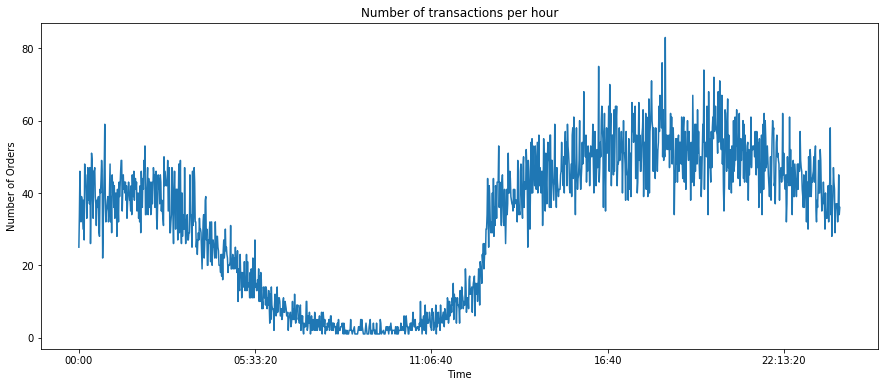

In [156]:
# plot number of transactions per hour
orders1 = df.groupby(by=['Time'], as_index=False)['PurchaseValue'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders1.Time, orders1.PurchaseValue)
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.title('Number of transactions per hour')
plt.show()

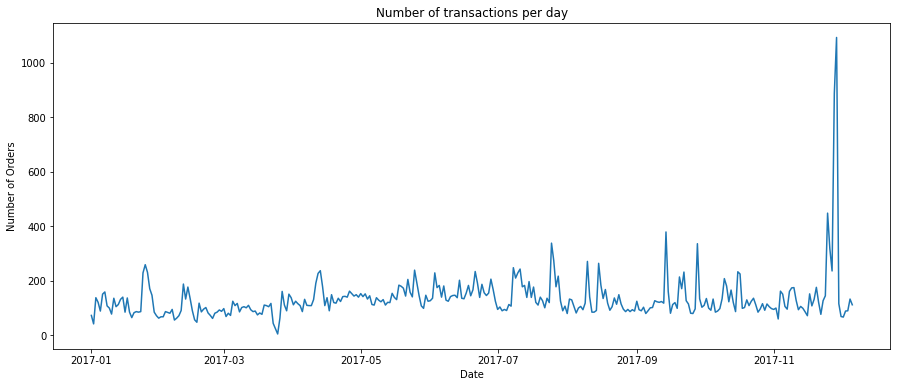

In [157]:
# plot number of transactions per day
orders2 = df.groupby(by=['Date'], as_index=False)['PurchaseValue'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders2.Date, orders2.PurchaseValue)
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of transactions per day')
plt.show()

In [158]:
print("Top 10 customers with highest number of transactions are:")
print(orders2.sort_values(by='PurchaseValue').tail(10))

Top 10 customers with highest number of transactions are:
          Date  PurchaseValue
225 2017-08-15            264
220 2017-08-10            271
205 2017-07-26            274
328 2017-11-26            318
269 2017-09-28            336
204 2017-07-25            338
255 2017-09-14            379
327 2017-11-25            448
330 2017-11-28            887
331 2017-11-29           1092


    From results above, we know that the number of transactions reached a peak on 2017-11-29.

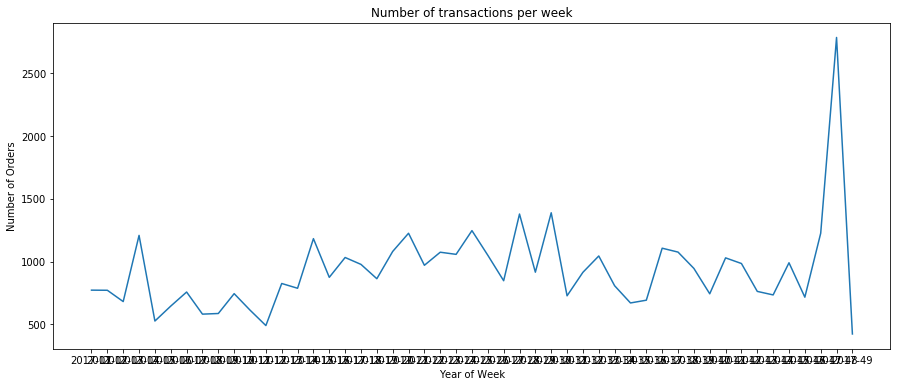

In [159]:
# plot number of transactions per week
orders3 = df.groupby(by=['YearWeek'], as_index=False)['PurchaseValue'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders3.YearWeek, orders3.PurchaseValue)
plt.xlabel('Year of Week')
plt.ylabel('Number of Orders')
plt.title('Number of transactions per week')
plt.show()

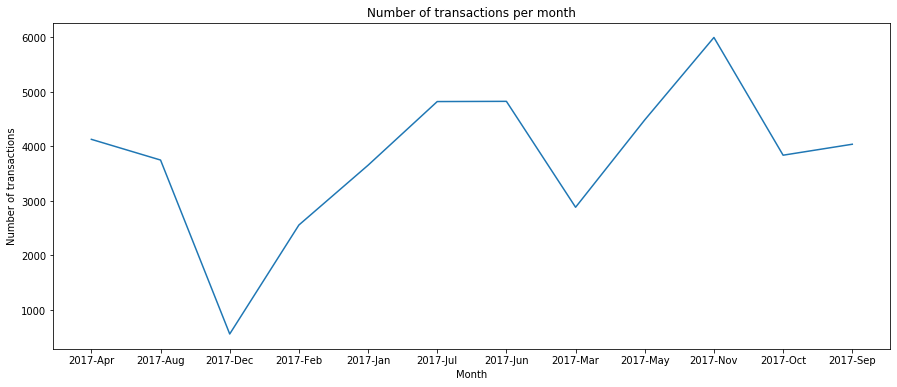

In [160]:
# plot number of transactions per month
orders4 = df.groupby(by=['YearMonth'], as_index=False)['PurchaseValue'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders4.YearMonth, orders4.PurchaseValue)
plt.xlabel('Month')
plt.ylabel('Number of transactions')
plt.title('Number of transactions per month')
plt.show()

    Based on plots above, we can see that the number of transactions reached a peak around 2017-11-29. The fluctuations were possibly due to promotional activities before the New Year. 

***Note: Usually major promotional activities are held at the end of the summer, before and during religious holidays, and before the New Year.***
    
    Promotional activities are very common in E-commerce stores to increase sales and to recruit new customers, since the majority of customers are very sensitive to such activities. Promotional activities and low shop switching costs are some of the reasons for customer heterogeneity in E-commerce shopping.

    Other insights include that customers tend to buy widgets around 8pm, which can be used to conduct other ad-hoc analysis.

<a id='step5'></a>

# Step 5: Model Fitting

<a id='destination_tag'></a>

## <font color='blue'>1. Implement the modified BG model from the lifetimes package using the data we provide.</font>

    Based on my research, time unit is usually week or day for modified BG model. For an E-commerce store that sells widgets, the typical customer buying cycle is usually week. In Fader and Hardie's paper, they used week as time unit to build BG models. Considering all of factors above, I aggregated daily purchases by individuals into a weekly frequency and continued on with my analysis.

count    21957.000000
mean         0.904085
std          1.727047
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         40.000000
Name: frequency, dtype: float64
Percentage of customers who only made purchase once is 0.6067768820877169
Percentage of customers who 0,1,2 purchases is 0.8850480484583504


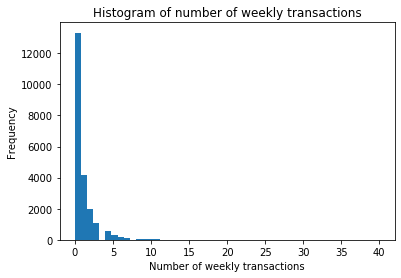

In [7]:
## data transformation - week as time unit
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data
summary_week = summary_data_from_transaction_data(df, 'CustomerID', 'Date', freq = "W", 
                                             observation_period_end='2017-12-06',
                                            monetary_value_col = "PurchaseValue")
# summarize the data after processing
summary_week['frequency'].plot(kind='hist', bins=50)
plt.title('Histogram of number of weekly transactions')
plt.xlabel('Number of weekly transactions')
print(summary_week['frequency'].describe())

# Percentage of customers who only made purchase once 
print("Percentage of customers who only made purchase once is", sum(summary_week['frequency'] == 0)/float(len(summary_week)))

# Percentage of customers who 0,1,2 purchases
print("Percentage of customers who 0,1,2 purchases is", sum(summary_week['frequency'] <= 2)/float(len(summary_week)))


    From the results above, we can know that among all customers in dataset, approximately 61% of customers are zero repurchasers. Customers with 0, 1, or 2 repurchases made up around 88% of the total customers.
    
 ***Note: It indicates that high heterogeneity in purchases decreases the precision of the models.***

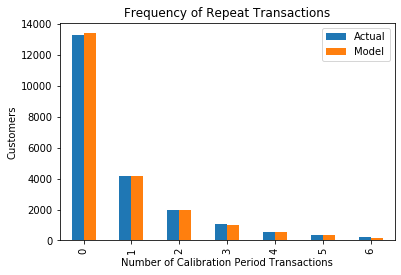

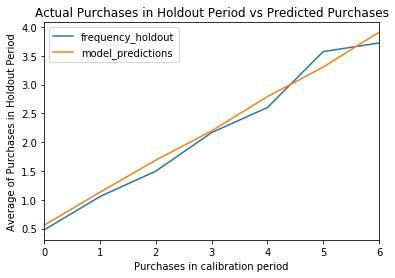

In [9]:
from lifetimes.utils import calibration_and_holdout_data

## partition the dataset into a calibration period dataset and a holdout dataset
## according to paper, the first half time period for training part, the remaining time period for testing part
summary_cal_holdout = calibration_and_holdout_data(df, 'CustomerID', 'Date', freq = "W",
                                        calibration_period_end='2017-06-20',
                                        observation_period_end='2017-12-06' )

# perform fitting on the _cal columns, and test on the _holdout columns
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import lifetimes.fitters 

# implement MBG model
## In typical applications, penalizers on the order of 0.001 to 0.1 are effective.
## The coefficient is 0.001 because predicted purchase close to actual purchase
bgf = lifetimes.fitters.modified_beta_geo_fitter.ModifiedBetaGeoFitter(penalizer_coef=0.001)
bgf.fit(summary_week['frequency'], summary_week['recency'], summary_week['T'])

# assess model fit  
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

# test how our model performs on data not yet seen
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

    After tunning paramter (penalizers), model performance and validation assessment are not bad for the model. So I continued on with my analysis.

<a id='q2'></a>

## <font color='blue'> 2.List the 100 customers predicted to make the most purchases over the next 12 months.<font color='blue'>

In [163]:
# load the model
bgf = lifetimes.fitters.modified_beta_geo_fitter.ModifiedBetaGeoFitter(penalizer_coef=0.001)
bgf.fit(summary_week['frequency'], summary_week['recency'], summary_week['T'])

# since the unit of time is week, 12 months is equal to 52.14 weeks. So t=52.14
t = 52.14
summary_week['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_week['frequency'], summary_week['recency'], summary_week['T'])
summary_week.sort_values(by='predicted_purchases').tail(100)

frequency  recency     T  monetary_value  \
CustomerID                                                                   
132f21d8278947c1745e0a7ded3e6f76       11.0     30.0  39.0       90.931818   
a92534133444b5028d12a129b1b128f7        5.0     10.0  11.0      927.392000   
790db2925ed67d6763fc0525aa7fa52e       11.0     46.0  47.0      177.789091   
8b6aa340953dad198a9d60bd12abfcb9       11.0     46.0  47.0      574.135455   
c0932084a28f1f941072feac6a4d4570       10.0     35.0  39.0      201.185000   
...                                     ...      ...   ...             ...   
a62a17bb46864da2c6da691d838971b3       22.0     47.0  47.0      407.015909   
9f447f9415a380ac2eeee7df49c6ee7e       16.0     23.0  24.0      154.496250   
8d2ce54737dd404d20cadf1405d46dc8       26.0     48.0  48.0      151.398077   
48a503edbaded96a3be27deee11967a1       29.0     47.0  48.0      294.439310   
a5fadc51b1ae844ad9a70ad3cfa46a64       40.0     46.0  46.0      910.508000   

                                  predicted_purchases  
CustomerID                                             
132f21d8278947c1745e0a7ded3e6f76             8.333587  
a92534133444b5028d12a129b1b128f7             8.380548  
790db2925ed67d6763fc0525aa7fa52e             8.445096  
8b6aa340953dad198a9d60bd12abfcb9             8.445096  
c0932084a28f1f941072feac6a4d4570             8.494634  
...                                               ...  
a62a17bb46864da2c6da691d838971b3            16.404852  
9f447f9415a380ac2eeee7df49c6ee7e            17.720009  
8d2ce54737dd404d20cadf1405d46dc8            19.019309  
48a503edbaded96a3be27deee11967a1            21.042279  
a5fadc51b1ae844ad9a70ad3cfa46a64            29.784002  

[100 rows x 5 columns]

<a id='q3'></a>

## <font color='blue'>3. List the 100 customers predicted to spend the most over the next 12 months.<font color='blue'>

Firstly, I need to explicitly define *"customers predicted to spend the most over the next 12 months"*. 

My definition of it is customers who have the largest **customer lifetime value** (**CLV**) in the coming 12 months. Because the business goal of predicting customers who spent the most is to allow the company to spend money on retaining and attracting ***most ideal customers***,i.e., customers who are (highly) likely to purchase in the next year. CLV has the same business goal, because the higher the CLV, the greater the profits.

Based on *lifetimes* documentation, **Gamma-Gamma** model is used to estimate average monetary value of customer transactions. 

**Independence assumption:**

The **Gamma-Gamma** model assumes that there is no relationship between the monetary value and the purchase frequency. So I need to check whether the Pearson correlation between the two vectors is close to 0 before using this model.

*Note: Gamma-Gamma model rejects the assumption that customers will follow a strictly-linear trend.*

In [121]:
returning_customers_summary = summary_week[summary_week['frequency']>0]
# check independence assumption 
returning_customers_summary[['monetary_value', 'frequency']].corr()

monetary_value  frequency
monetary_value        1.000000   0.049817
frequency             0.049817   1.000000

Pearson correlation between the two vectors is **0.05** - quite close to 0, so we can continue to train **Gamma-Gamma** model.

Here I used the default value **0.1** for monthly adjusted discount rate. But in reality, the monthly adjusted discount rate would vary according to external factors, like marketing events or holidays. 

***Note that customers who spend the most are only an estimation, because I predicted CLV based on historical events.*** 

In [164]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)

# implement Gamma Gamma model
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

# model prediction
returning_customers_summary["predicted_values"] = ggf.customer_lifetime_value(bgf, returning_customers_summary['frequency'], returning_customers_summary['recency'], returning_customers_summary['T'], returning_customers_summary['monetary_value'],time=12, discount_rate=0.01, freq='W')

# List the 100 customers predicted to spend the most over the next 12 months
returning_customers_summary.sort_values(by='predicted_values').tail(100)

frequency  recency     T  monetary_value  \
CustomerID                                                                   
0de9fe4a38ad31889dd8c2d0ded96a29        2.0     16.0  16.0     1130.015000   
25e5fe3494dcb7d0de25fcd6f6b499d9       11.0     39.0  42.0      375.516364   
6061e84cb60705e4a2a378538353ba4d        7.0     46.0  48.0      634.024286   
b8f4ff5e0a2192aeca83d08b78ee9a56        2.0     26.0  28.0     1519.725000   
35bd91d013d04ffe65a66c2864be2c63        4.0     29.0  30.0      817.580000   
...                                     ...      ...   ...             ...   
98f8e41f45721cbe49a3147f6cf62432        1.0      5.0  10.0     5273.580000   
60c19a709e3ced2d16d7100eb1069df5       10.0     42.0  43.0     1259.266000   
5ac5ed64cd99ed2a8403b7a927e644ef       17.0     32.0  36.0      848.888824   
ca2202a96c2de6ca6b8a37a4a73fa730        2.0      2.0   3.0     3589.625000   
a5fadc51b1ae844ad9a70ad3cfa46a64       40.0     46.0  46.0      910.508000   

                                  predicted_purchases  predicted_values  
CustomerID                                                               
0de9fe4a38ad31889dd8c2d0ded96a29             3.552342       3099.599998  
25e5fe3494dcb7d0de25fcd6f6b499d9             8.954747       3103.718758  
6061e84cb60705e4a2a378538353ba4d             5.474539       3105.036578  
b8f4ff5e0a2192aeca83d08b78ee9a56             2.694658       3111.486047  
35bd91d013d04ffe65a66c2864be2c63             4.493753       3141.430747  
...                                               ...               ...  
98f8e41f45721cbe49a3147f6cf62432             2.523139       8074.023945  
60c19a709e3ced2d16d7100eb1069df5             8.184305       9246.408216  
5ac5ed64cd99ed2a8403b7a927e644ef            14.513858      11299.506987  
ca2202a96c2de6ca6b8a37a4a73fa730             5.249858      13955.138933  
a5fadc51b1ae844ad9a70ad3cfa46a64            29.784002      25203.591482  

[100 rows x 6 columns]

<a id='q4'></a>

## <font color='blue'> 5.Write a simulation: <font color='blue'>

In [10]:
# implement MBG model

bgf = lifetimes.fitters.modified_beta_geo_fitter.ModifiedBetaGeoFitter(penalizer_coef=0.08)

class Simulation:
    """
    Description: 
    Simulate how many customers alive and how many purchases they have made in the future using the modified BG model
    
    Parameters:
    t: times to calculate the expectation for; week is the time unit
    size: number of samples
    random_state: sets None if we want to see a different number of customers alive each time the code is evaluated. 
    
    Returns a dataframe that contains predicted number of purchases and probability of alive for each customer
    """
    def __init__(self, t, size,random_state):
        self.t = t
        self.random_state = random_state
        self.size = size

    def run(self):
        
        # Generate a random sample of customers
        self.summary1 = summary_week.sample(n=self.size, random_state = self.random_state)
        
        # Simulate how each customer makes purchases over time.
        bgf.fit(self.summary1['frequency'], self.summary1['recency'], self.summary1['T'])
        
        self.summary1["number_of_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(self.t, self.summary1['frequency'], self.summary1['recency'], self.summary1['T'])
        self.summary1["probability_of_alive"] = bgf.conditional_probability_alive(self.summary1['frequency'], self.summary1['recency'], self.summary1['T']+self.t)
        
        return self.summary1   

    Each time the following code is executed, the simulation would be performed 100 times, and then I take the average of them in order to make total number of customers alive and total number of purchases more robust.

**<font color='blue'> Count how many purchases the customers have made in 10 days and how many customers are alive after 10 days.**<font color='blue'> 

In [63]:
# 10 days = 1.43 week, so t = 1.43
sim = Simulation(t=1.43, size=100, random_state = None)
simulations_num_alive = []
simulations_num_purchases = []

# run simulation 100 times and average results 
# to get total number of customers alive and total number of purchases
for _ in range(100):
    dat = sim.run()
    simulations_num_alive.append(np.sum(dat[["probability_of_alive"]]))
    simulations_num_purchases.append(np.sum(dat[["number_of_purchases"]]))
print("After 10 days:")
print("Total number of customers alive:", np.mean(simulations_num_alive))
print("Total number of purchases:", np.mean(simulations_num_purchases))

After 10 days:
Total number of customers alive: 95.94421036566845
Total number of purchases: 4.962630827510951


 **<font color='blue'> Count how many purchases the customers have made in 1 year and how many customers are alive after 1 year.**<font color='blue'> 

In [65]:
# 1 year = 52.14 weeks, so t = 52.14
sim = Simulation(t=52.14, size=100, random_state = None)
simulations_num_alive = []
simulations_num_purchases = []

# run simulation 100 times and average results 
# to get total number of customers alive and total number of purchases
for _ in range(100):
    dat = sim.run()
    simulations_num_alive.append(np.sum(dat[["probability_of_alive"]]))
    simulations_num_purchases.append(np.sum(dat[["number_of_purchases"]]))
print("After 1 year:")
print("Total number of customers alive:", np.mean(simulations_num_alive))
print("Total number of purchases:", np.mean(simulations_num_purchases))

After 1 year:
Total number of customers alive: 94.65840030474926
Total number of purchases: 174.71172967341988


 **<font color='blue'> Count how many purchases the customers have made in 10 years and how many customers are alive after 10 years.**<font color='blue'> 

In [12]:
# 10 years = 521.4 weeks, so t = 521.4
sim = Simulation(t=521.4, size=100, random_state = None)
simulations_num_alive = []
simulations_num_purchases = []

# run simulation 100 times and average results 
# to get total number of customers alive and total number of purchases
for _ in range(100):
    dat = sim.run()
    simulations_num_alive.append(np.sum(dat[["probability_of_alive"]]))
    simulations_num_purchases.append(np.sum(dat[["number_of_purchases"]]))
print("After 10 years:")
print("Total number of customers alive:", np.mean(simulations_num_alive))
print("Total number of purchases:", np.mean(simulations_num_purchases))

After 10 years:
Total number of customers alive: 93.3326076502289
Total number of purchases: 1704.1139059163124


 **<font color='blue'> Count how many purchases the customers have made in 100 years and how many customers are alive after 100 years.**<font color='blue'> 

In [11]:
# 100 years = 5214 weeks, so t = 5214
sim = Simulation(t=5214, size=100, random_state = None)
simulations_num_alive = []
simulations_num_purchases = []

# run simulation 100 times and average results 
# to get total number of customers alive and total number of purchases
for _ in range(100):
    dat = sim.run()
    simulations_num_alive.append(np.sum(dat[["probability_of_alive"]]))
    simulations_num_purchases.append(np.sum(dat[["number_of_purchases"]]))
print("After 100 years:")
print("Total number of customers alive:", np.mean(simulations_num_alive))
print("Total number of purchases:", np.mean(simulations_num_purchases))

After 100 years:
Total number of customers alive: 91.30100347203232
Total number of purchases: 17655.604954311122


***Takeaway: We can clearly see that predictions for 100 customers are not accurate at all. For example, number of customers alive should decrease quickly in 1 year, and in reality no one should be alive after 100 years.***

<a id='q6'></a>

# References: 

1.<a href='https://www.sciencedirect.com/science/article/pii/S0167811607000171'>https://www.sciencedirect.com/science/article/pii/S0167811607000171</a>

2.<a href='http://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf'>http://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf</a>

3.<a href='https://towardsdatascience.com/predicting-customer-lifetime-value-with-buy-til-you-die-probabilistic-models-in-python-f5cac78758d9'>https://towardsdatascience.com/predicting-customer-lifetime-value-with-buy-til-you-die-probabilistic-models-in-python-f5cac78758d9</a>

4.<a href='https://towardsdatascience.com/whats-a-customer-worth-8daf183f8a4f'>https://towardsdatascience.com/whats-a-customer-worth-8daf183f8a4f</a>

5.<a href='https://medium.com/bolt-labs/understanding-the-customer-lifetime-value-with-data-science-c14dcafa0364'>https://medium.com/bolt-labs/understanding-the-customer-lifetime-value-with-data-science-c14dcafa0364</a>

6.<a href='https://keyanyang.com/statistics/2018/12/01/customer-lifetime-value-use-bg-nbd-model-to-simulate-customer-purchase'>https://keyanyang.com/statistics/2018/12/01/customer-lifetime-value-use-bg-nbd-model-to-simulate-customer-purchase</a>

7.<a href='https://lifetimes.readthedocs.io/en/latest/Quickstart.html#estimating-customer-lifetime-value-using-the-gamma-gamma-model'>https://lifetimes.readthedocs.io/en/latest/Quickstart.html#estimating-customer-lifetime-value-using-the-gamma-gamma-model</a>

8.<a href='https://sebastianraschka.com/faq/docs/multiclass-metric.html'>https://sebastianraschka.com/faq/docs/multiclass-metric.html</a>

9.<a href='https://github.com/CamDavidsonPilon/lifetimes/issues/180'>https://github.com/CamDavidsonPilon/lifetimes/issues/180</a>

10.<a href='https://github.com/CamDavidsonPilon/lifetimes/issues/65'>https://github.com/CamDavidsonPilon/lifetimes/issues/65</a>

11.<a href='https://www.klaviyo.com/blog/ai-powered-customer-lifetime-value'>https://www.klaviyo.com/blog/ai-powered-customer-lifetime-value</a>

12.<a href='http://www.scriptiesonline.uba.uva.nl/document/653317'>http://www.scriptiesonline.uba.uva.nl/document/653317</a>

13.<a href='https://www.researchgate.net/publication/275272156_Forecasting_customer_buying_behaviour_-_Controlling_for_Seasonality'>https://www.researchgate.net/publication/275272156_Forecasting_customer_buying_behaviour_-_Controlling_for_Seasonality</a>
    
    
  

